In [1]:
#Rahevin Potter-Clark
#With collaboration with 
#Alexandria LeClerc, Mason Stokes, and Nathan Stark

import numpy as npy
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

cdata1 = npy.load('cdata1.npy')
cdata2 = npy.load('cdata2.npy')
seed_data = npy.load('seed_data.npy')

<function matplotlib.pyplot.show(*args, **kw)>

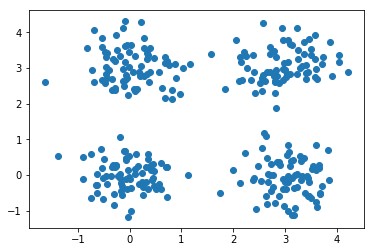

In [29]:
#1) start by examining a 2d scatterplot of cdata1  how many clusters do you 
#think you see?
x,y = cdata1.T

plt.scatter(x,y)
plt.show

# I see four clusters

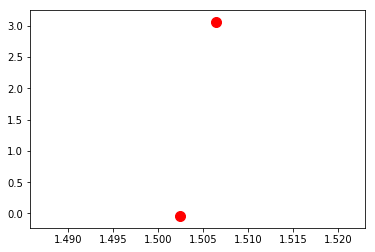

In [3]:
#2) Use scikit-Learn to perform k-means clustering starting with 2 cluster centers,

##the 2 cluster centers plotted
kmeans = KMeans(n_clusters=2)
kmeans.fit(cdata1)
ymeans = kmeans.predict(cdata1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1)

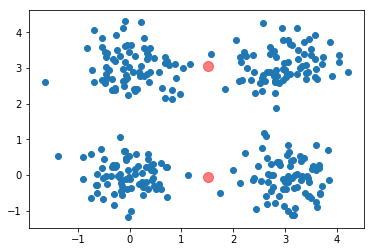

In [27]:
#3) produce a 2d scatterplot showing the observations and the cluster centers
##Centers of Clusters

plt.scatter(x,y)

kmeans = KMeans(n_clusters=2)
kmeans.fit(cdata1)
ymeans = kmeans.predict(cdata1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)



In [5]:
#4)calculated the sillhouette score for your clusters, this is an intrinsic measure of cluster fit

labels = kmeans.labels_
silhouette_score(cdata1, labels)

0.4705591156593103

In [6]:
#5) repeat the above steps starting with 3,4,5,and 6 clusters

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(cdata1)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(cdata1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5488538441101815
For n_clusters = 4 The average silhouette_score is : 0.6865348560101582
For n_clusters = 5 The average silhouette_score is : 0.6001839588020145
For n_clusters = 6 The average silhouette_score is : 0.5222542367074665


In [7]:
#6) compare the results, how many clusters best capture the data?

#it looks like 4 clusters best capture the data, as it is closet to positive 1. 

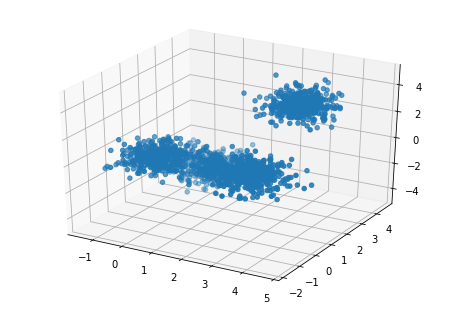

In [20]:
#7) reapeat the above process for cdata2, you will need to draw 3d plots if you want a visual representation, 
#how many clusters best capture the data?

x2, y2, z2 = cdata2.T

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x2, y2, z2)
plt.show()


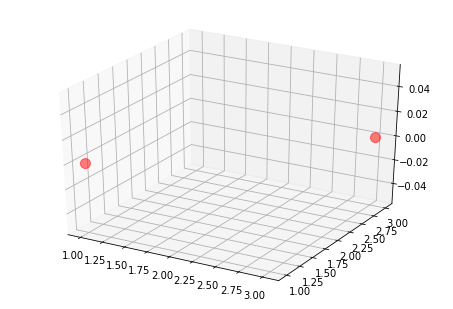

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
kmeans = KMeans(n_clusters=2)
kmeans.fit(cdata2)
ymeans = kmeans.predict(cdata2)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.show()

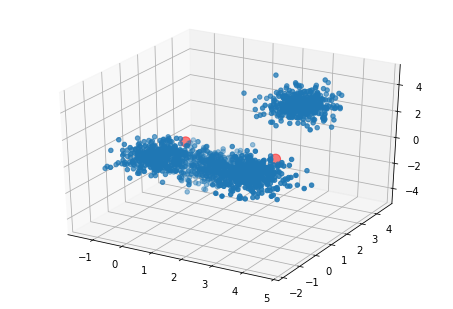

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x2, y2, z2)
kmeans = KMeans(n_clusters=2)
kmeans.fit(cdata2)
ymeans = kmeans.predict(cdata2)
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.show()

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters=n_clusters)    
    kmeans.fit(cdata2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(cdata2, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
#it appears the 4 clusters is the best observation. 

For n_clusters = 2 The average silhouette_score is : 0.44441804216078196
For n_clusters = 3 The average silhouette_score is : 0.6283730714180688
For n_clusters = 4 The average silhouette_score is : 0.6868161005750114
For n_clusters = 5 The average silhouette_score is : 0.562131895073426
For n_clusters = 6 The average silhouette_score is : 0.4443319496105857


In [105]:
#8) repeat the above process for the seeds data, but only consider the first 7 variables as part of the observations, 
#the 8th variable is a class label


variables = seed_data[:, :7]
labels = seed_data[:, 7]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters=n_clusters)    
    kmeans.fit(variables)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(variables, cluster_labels)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

#print(variables)
print('\n The labels are: \n')
print(labels, '\n')
print('Based on our silhouette score we can assume that there are 2 clusters,') 
print(' but based on our labels pulled from the data it states there are 3.')


For n_clusters = 2 The average silhouette_score is : 0.51828734108491
For n_clusters = 3 The average silhouette_score is : 0.4719337319126893
For n_clusters = 4 The average silhouette_score is : 0.41252802375298225
For n_clusters = 5 The average silhouette_score is : 0.3606134433450119
For n_clusters = 6 The average silhouette_score is : 0.3665645053867352

 The labels are: 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 

In [108]:
#9) compare the extrinsic metrics.homogeneity_completeness_v_measure() scores for the different 
#numbers of clusters, notice the trade off between homogeneity and completeness.
#do the intrinsice and extrinsic fit measures agree on the number of clusters?

for i in range(2,6):         
    kmeans = KMeans(n_clusters=i)    
    kmeans.fit(variables)
    print('Clusters of =',i ,metrics.homogeneity_completeness_v_measure(labels, kmeans.labels_))


#print('Homogeneity = ',metrics.homogeneity_score(labels, kmeans.labels_))
#print('Completeness = ',metrics.completeness_score(labels, kmeans.labels_))
#print('V measure = ',metrics.v_measure_score(labels, kmeans.labels_))

print('\nIt appears that neither format of measurements aggrees on what the number of clusters in the data set')


Clusters of = 2 (0.4322359529864315, 0.7055742906586695, 0.536072825198964)
Clusters of = 3 (0.6934607041029826, 0.696395547296022, 0.6949250270680578)
Clusters of = 4 (0.7174591453498347, 0.5740416506773126, 0.6377873453226984)
Clusters of = 5 (0.7372110325871362, 0.5085101012307528, 0.6018670577746107)

It appears that neither format of measurements aggrees on what the number of clusters in the data set
